### Multivariate Regression

In most of the real life use cases there will be more than one independent variable, so the concept of having multiple independent variables is called as multivariate regression. The equation take the below form.

$y = m_1 x_1 + m_2 x_2 + m_3 x_3 + . . .+ m_n x_n$
Where, each independent variable is represented by x’s, and m’s are the corresponding coefficients.


## Housing data

We'll be using the housing data from the Rdatasets from https://vincentarelbundock.github.io/Rdatasets/

The housing data contains sales prices of houses in the city of Windsor. Below is the brief description about each variables.
- **price: sale price of a house**
- lotsize: the lot size of a property in square feet
- bedrooms: number of bedrooms
- bathrms: number of full bathrooms
- stories: number of stories excluding basement
- driveway: does the house has a driveway ?
- recroom: does the house has a recreational room ?
- fullbase: does the house has a full finished basement ?
- gashw: does the house uses gas for hot water heating ?
- airco: does the house has central air conditioning ?
- garagepl: number of garage places
- prefarea: is the house located in the preferred neighbourhood of the city ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Load Dataset**

In [5]:
dataset = pd.read_csv('Housing_Modified.csv') # loading dataset
dataset.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,one,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,two,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,one,yes,no,no,no,no,0,no


# Data Preprocessing
- Check Missing values
- Categorical Variable

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null object
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 51.3+ KB


** Checking Binary categorical**

In [8]:
dataset['stories'].unique()

array(['two', 'one', 'three', 'four'], dtype=object)

> Working with Binary categorical

In [9]:
from sklearn.preprocessing import LabelBinarizer

In [10]:
lb = LabelBinarizer() # default : no -> 0, yes -> 1

In [12]:
dataset.head(1)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no


In [14]:
dataset['driveway'] = lb.fit_transform(dataset['driveway'])
dataset['recroom'] = lb.fit_transform(dataset['recroom'])
dataset['fullbase'] = lb.fit_transform(dataset['fullbase'])
dataset['gashw'] = lb.fit_transform(dataset['gashw'])
dataset['airco'] = lb.fit_transform(dataset['airco'])
dataset['prefarea'] = lb.fit_transform(dataset['prefarea'])
dataset.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,1,0,1,0,0,1,0
1,38500.0,4000,2,1,one,1,0,0,0,0,0,0
2,49500.0,3060,3,1,one,1,0,0,0,0,0,0
3,60500.0,6650,3,1,two,1,1,0,0,0,0,0
4,61000.0,6360,2,1,one,1,0,0,0,0,0,0


** working multiple dummies **

In [21]:
stories_dum = pd.get_dummies(dataset['stories'],drop_first=True,
                             prefix='stories')
stories_dum.head()

,stories_one,stories_three,stories_two
0,0,0,1
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0


In [23]:
dataset_new = pd.concat((dataset,stories_dum),axis = 1)

del dataset_new['stories'] 
dataset_new.head()

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_one,stories_three,stories_two
0,42000.0,5850,3,1,1,0,1,0,0,1,0,0,0,1
1,38500.0,4000,2,1,1,0,0,0,0,0,0,1,0,0
2,49500.0,3060,3,1,1,0,0,0,0,0,0,1,0,0
3,60500.0,6650,3,1,1,1,0,0,0,0,0,0,0,1
4,61000.0,6360,2,1,1,0,0,0,0,0,0,1,0,0


**Co-relation**

In [25]:
cor = dataset_new.corr()

In [26]:
import seaborn as sns

!pip install seaborn

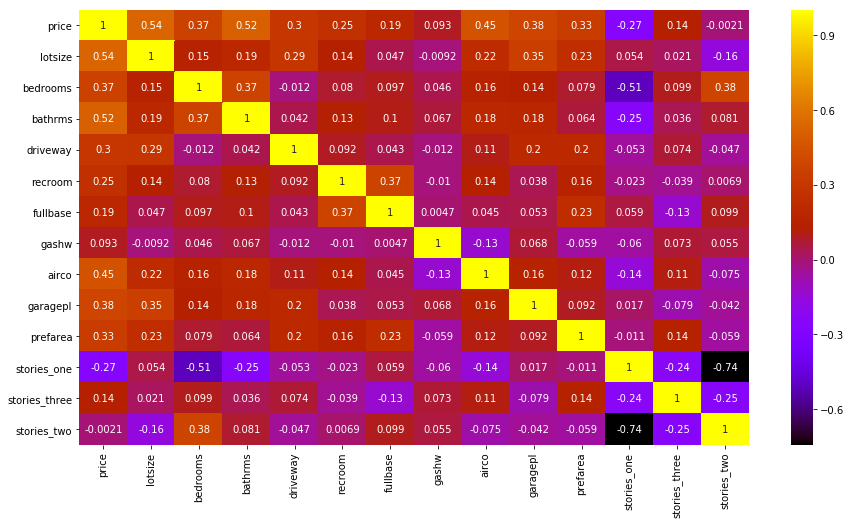

In [32]:
plt.figure(figsize=(15,8))
sns.heatmap(cor,annot=True,cmap = 'gnuplot')
plt.show()

**Extracting independent and dependent variables**

In [33]:
X = dataset_new.iloc[:,1:].values # independent variable
y = dataset_new.iloc[:,0].values # dependent variables

In [34]:
X.shape , y.shape

((546, 13), (546,))

**Spliting data into 80% training and 20 % testing set**

In [35]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,
                                                    train_size =0.8,
                                                   random_state=0)

In [36]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((436, 13), (110, 13), (436,), (110,))

# Building Machine Learning Model
- Multiple Linear Regression

!pip install statsmodels

In [37]:
import statsmodels.api as sm

C:\Users\srikanth\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [39]:
model = sm.OLS(y_train,x_train).fit() # training

In [41]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     682.2
Date:                Tue, 12 Jun 2018   Prob (F-statistic):          2.97e-274
Time:                        05:44:09   Log-Likelihood:                -4829.1
No. Observations:                 436   AIC:                             9684.
Df Residuals:                     423   BIC:                             9737.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.8404      0.416      9.238      0.0

# Visualizing Multiple linear regression

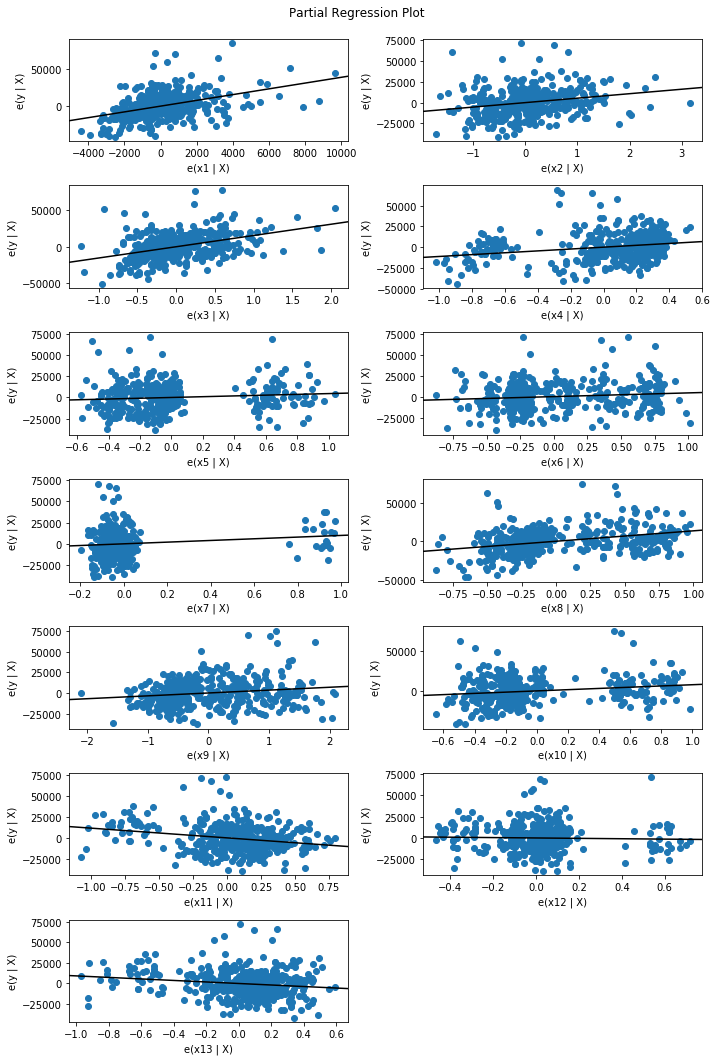

In [42]:
fig = plt.figure(figsize=(10,15))
fig = sm.graphics.plot_partregress_grid(model,fig=fig)
